<h1> 1. Customer segmentation </h1>

You are given a dataset of credit card transactions. The dataset contains 8500 customers and their activity over a 6-month period. Each transaction is characterized by 18 features described below.

Your task is to find the most useful customer segmentation to improve the marketing campaigns of the company.

<h2> The features:</h2>

<li>customer_id : id of the credit card holder</li>
<li>balance_account : balance amount left in the account to make purchases at the end of the 6-month period</li>
<li>purchases_amount : amount of purchases made from account</li>
<li>paid_advance : number of transactions made with “Cash in Advance” method</li>
<li>full_purchases : maximum purchase amount done in full payment</li>
<li>balance_frequency_update : how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)</li>
<li>installments : amount of purchases done in installments</li>
<li>purchases_frequency : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)</li>
<li>full_purchases_frequency : how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)</li>
<li>purchases_installments_frequency : how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)</li>
<li>cash_advance_frequency : how frequently the cash in advance being paid</li>
<li>nr_cash_advances : cash in advance given by the user</li>
<li>nr_purchases : number of purchase transactions made</li>
<li>credit_limit : limit of credit card for user</li>
<li>fixed_rate_period : duration of fixed interest rate of credit card service for user (in months)</li>
<li>payments : amount of payment done by user</li>
<li>min_payments : minimum amount of payments made by user</li>
<li>full_payment_prc : percent of full payment paid by user</li>


<h3> Importing libraries </h3>

In [1]:
# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import LogNorm
import plotly.express as px
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.manifold import TSNE

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

<h3> Import and Clean Data </h3>

In [2]:
data = pd.read_csv("card_transactions.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

<li>We drop the ID, because it is not helpful for the clustering</li>
<li>We have missing data in "credit limit" (1) and "min_payments" (298) - we fill them out using the k-Nearest Neighbours</li>

In [4]:
customers_id = data["customer_id"]
data = data.drop(columns=["customer_id"])

In [5]:
imputer = KNNImputer(n_neighbors=2)
data_clean = imputer.fit_transform(data)
data_clean = pd.DataFrame(data_clean, columns=data.columns)

In [6]:
len(data_clean)-len(data_clean.drop_duplicates())

0

No duplicate rows, so the data should be clean now.

<h3> Exploring Data, Tranforming, Scaling </h3>

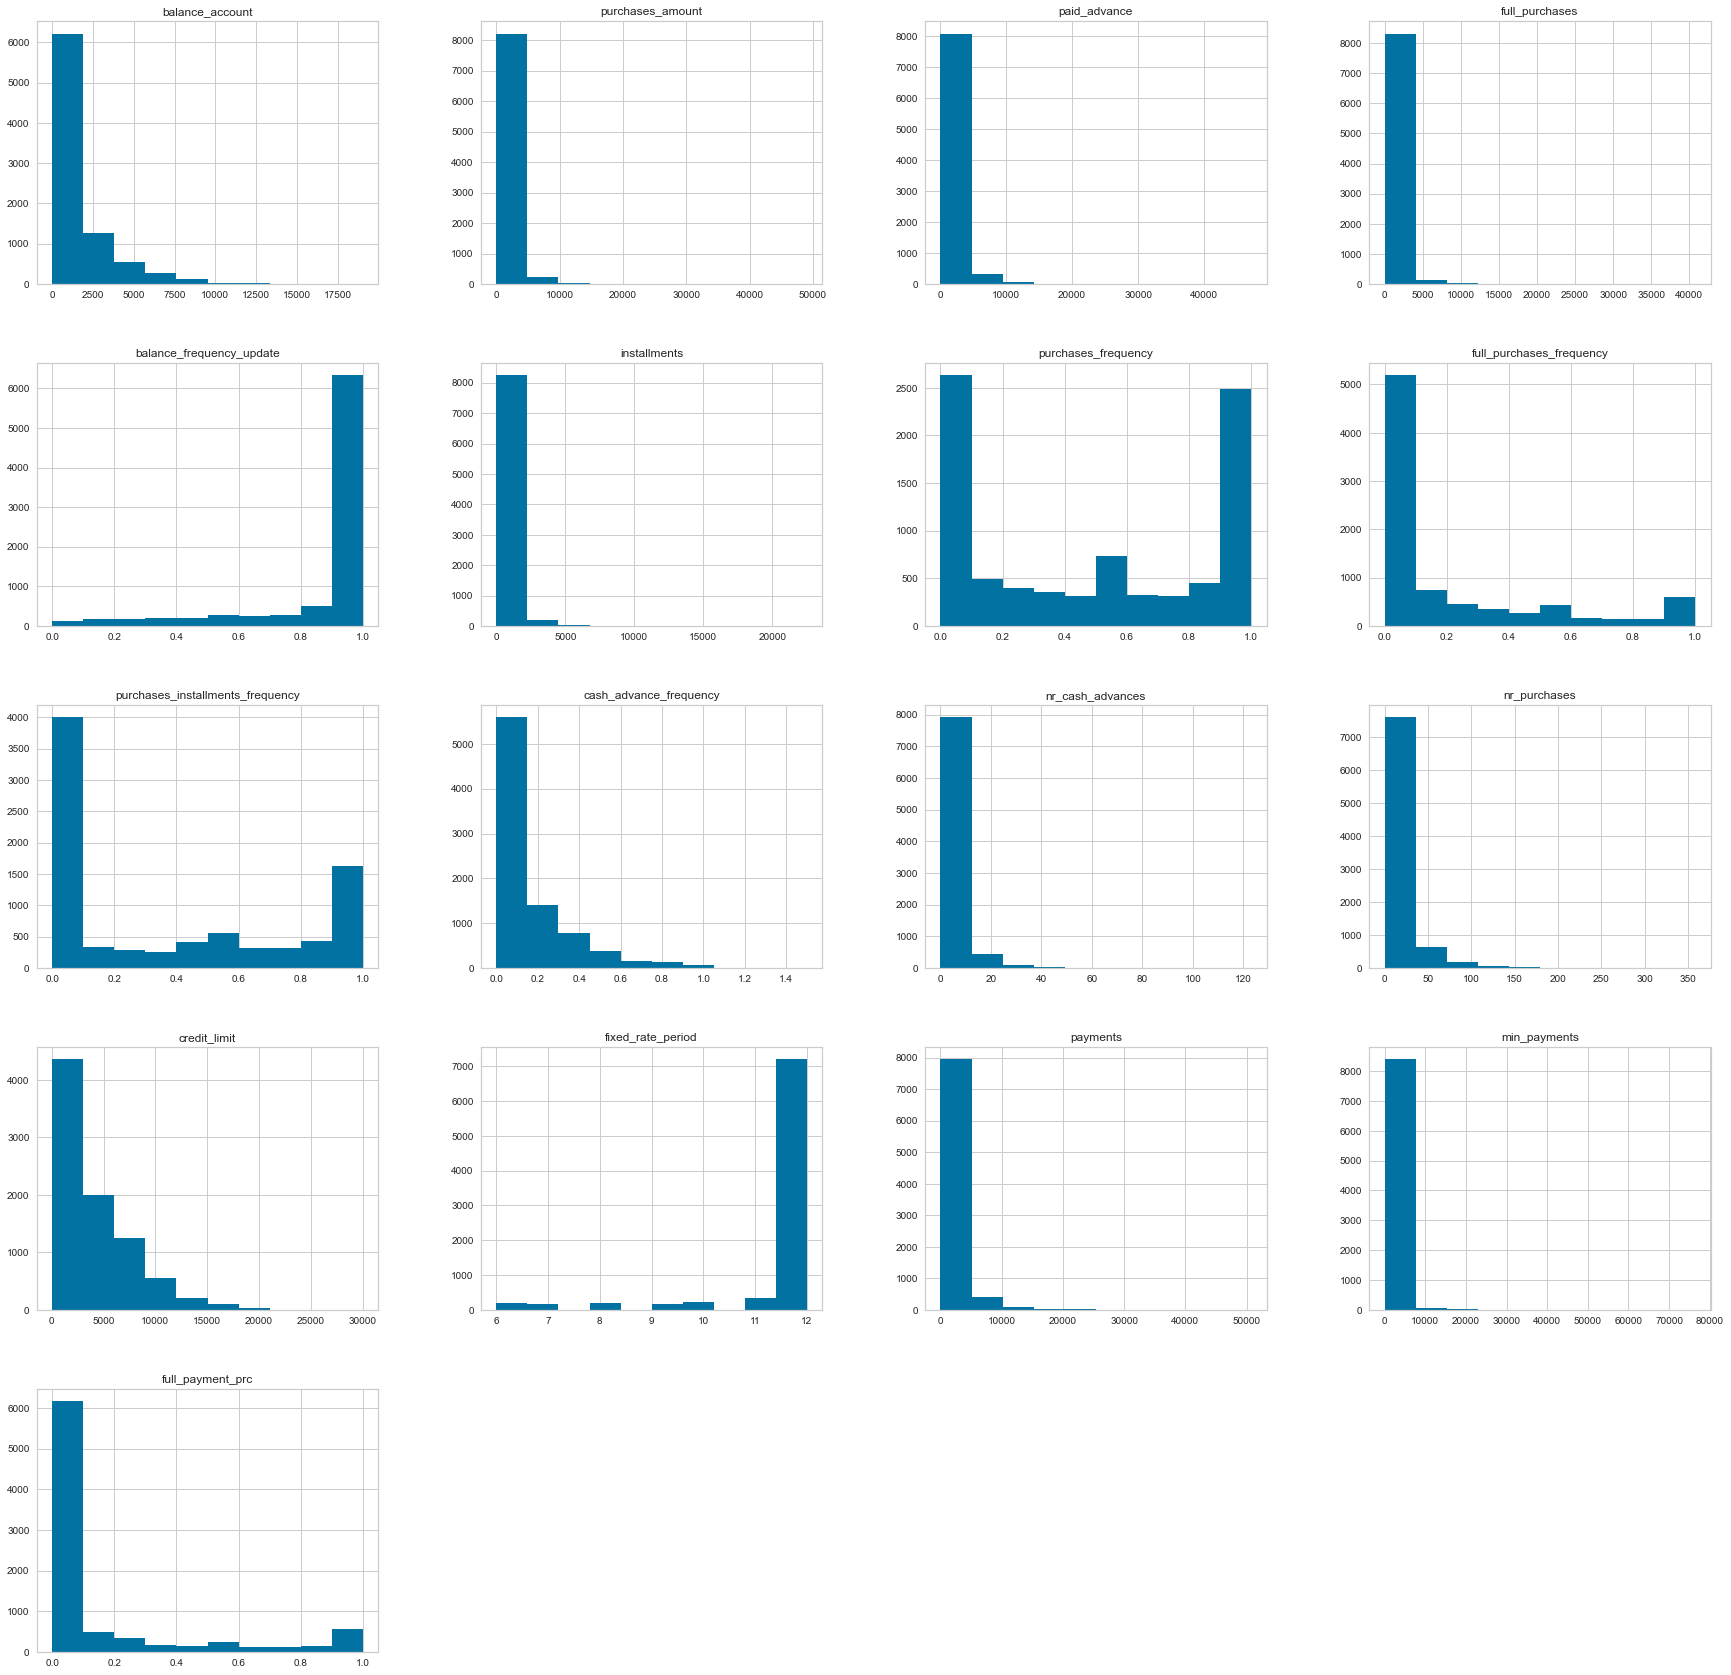

In [7]:
data_clean.hist(figsize=(30,30));

The data is quite skewed, after testing, we decided to use the log transformation.

In [8]:
data_log_trans = data_clean.copy(deep=True)
data_log_trans = data_log_trans + 1
data_log_trans = np.log(data_log_trans)

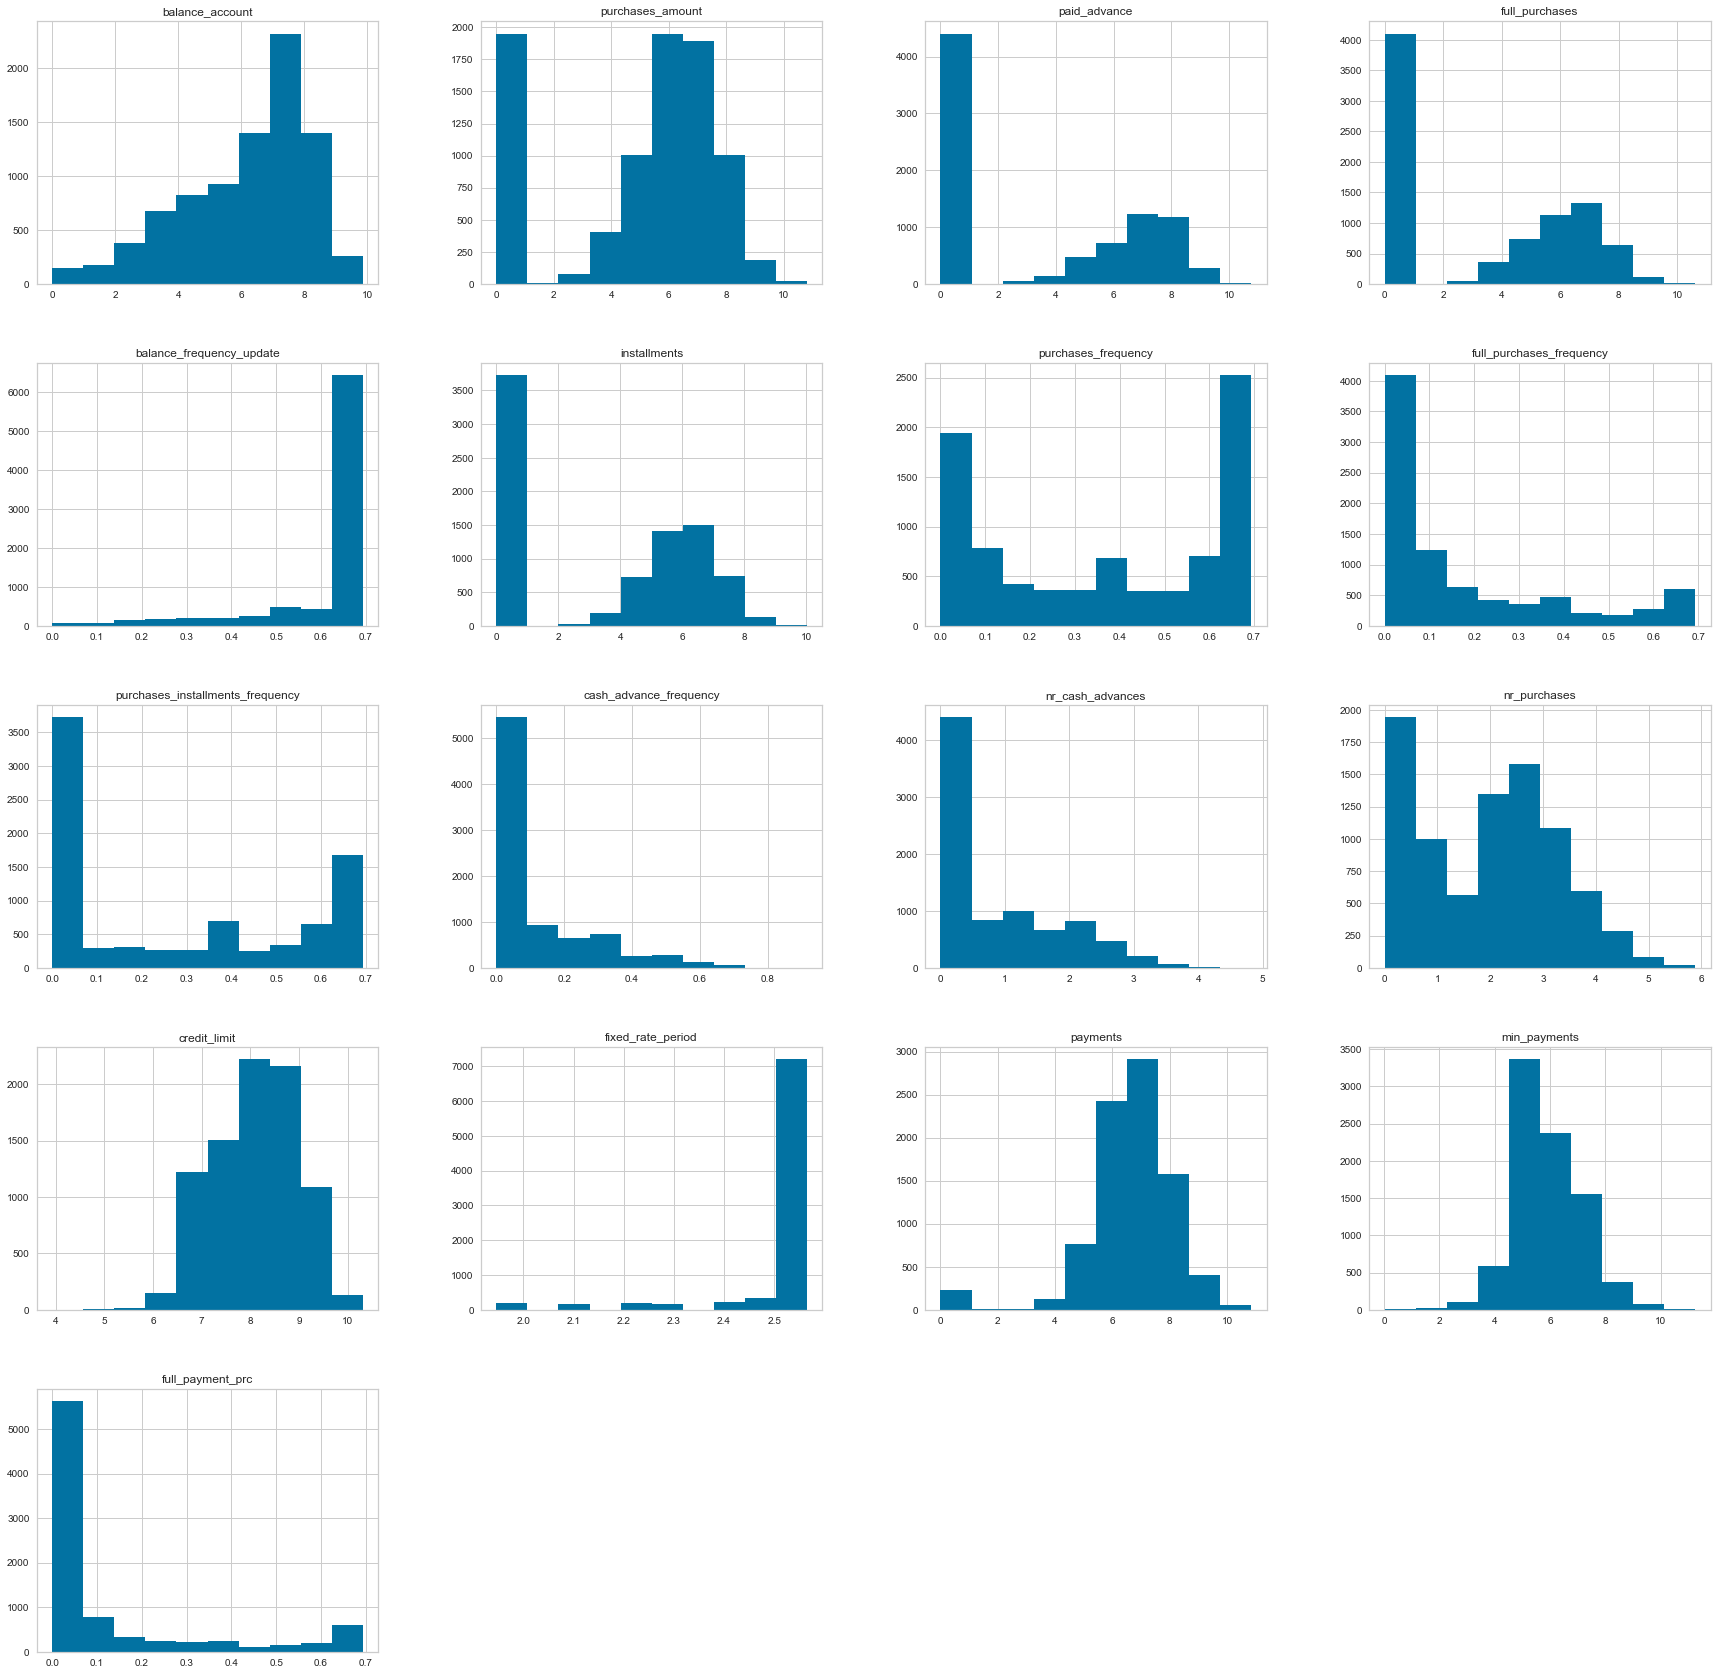

In [9]:
data_log_trans.hist(figsize=(30,30));

<h3> Clustering with k-Nearest Neighbours - selecting number of clusters </h3>

In [10]:
r_seed = 42

In [11]:
X = data_log_trans.values

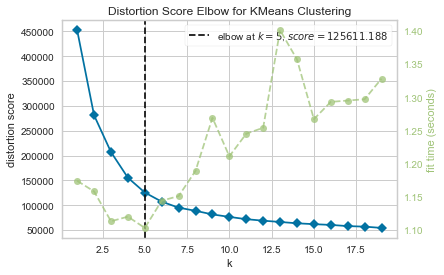

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
model = KMeans(random_state=r_seed, verbose=0)
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X)
visualizer.poof()

5 clusters seems to be the recommended number, we explore few options around with the silluete metric.

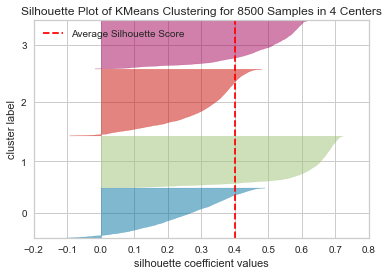

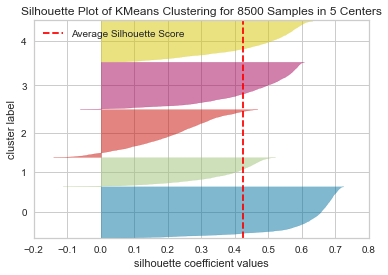

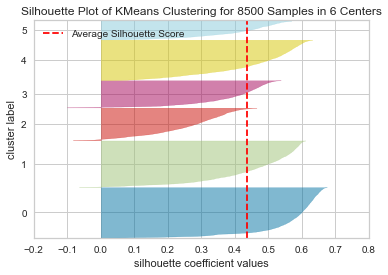

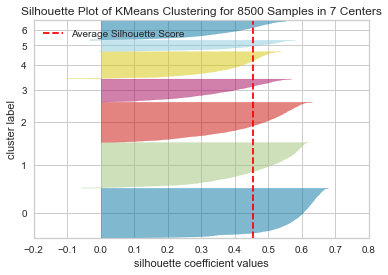

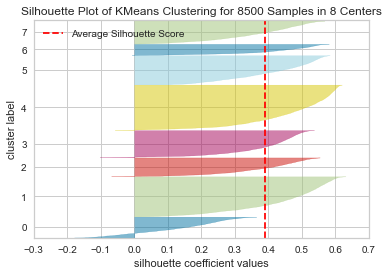

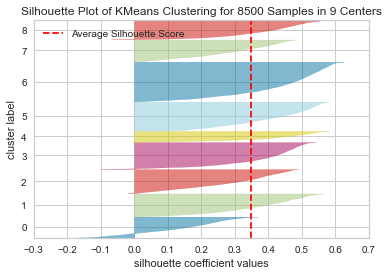

In [13]:
for c in range(4,10):
    model = KMeans(c, random_state=r_seed, verbose=0)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

<h3> TSNE </h3>

In [14]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, random_state=250)
X_tsne = tsne.fit_transform(data_log_trans)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8500 samples in 0.002s...
[t-SNE] Computed neighbors for 8500 samples in 0.859s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8500
[t-SNE] Computed conditional probabilities for sample 2000 / 8500
[t-SNE] Computed conditional probabilities for sample 3000 / 8500
[t-SNE] Computed conditional probabilities for sample 4000 / 8500
[t-SNE] Computed conditional probabilities for sample 5000 / 8500
[t-SNE] Computed conditional probabilities for sample 6000 / 8500
[t-SNE] Computed conditional probabilities for sample 7000 / 8500
[t-SNE] Computed conditional probabilities for sample 8000 / 8500
[t-SNE] Computed conditional probabilities for sample 8500 / 8500
[t-SNE] Mean sigma: 0.771734
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.674187
[t-SNE] KL divergence after 1000 iterations: 1.048345


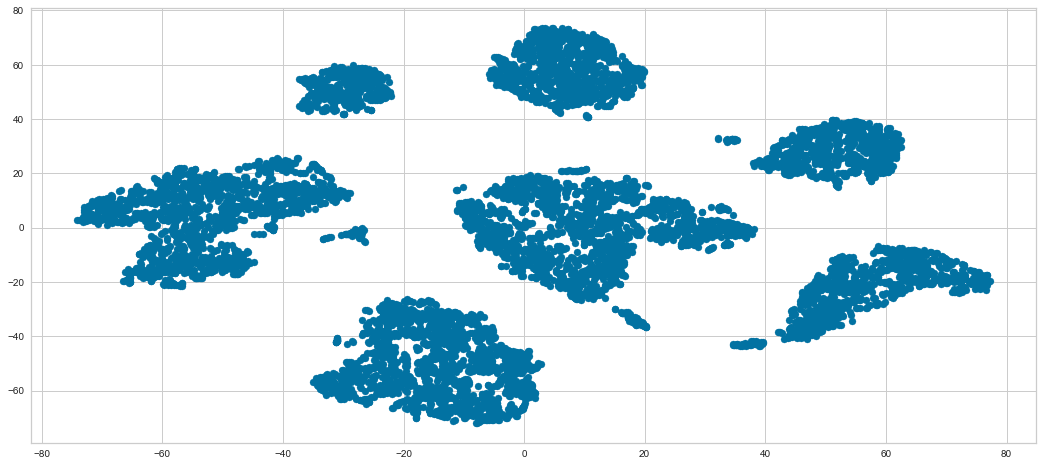

In [15]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

<h3> 7 clusters </h3>

We chose 7 because the silhouette coefficients are the best and the dimentionality reduction also points towards this split.

In [16]:
n_clusters = 7
kmeans_pipeline = Pipeline([("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])
kmeans_pipeline.fit(X_tsne)
labels = kmeans_pipeline.predict(X_tsne)
data_res = data_clean.copy(deep=True)
data_res["cluster"] = labels
data_res = data_res.set_index(customers_id.astype(str))

In [17]:
data_res.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,cluster
customer_id,,,,,,,,,,,,,,,,,,
tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0.0,10.0,1000.0,11.0,89.868853,89.711672,0.428571,5
stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,6.0,54.722514,82.955180,0.000000,5
CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6.0,0.0,1500.0,11.0,303.031979,443.781316,0.000000,6
0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.0,13.0,2000.0,12.0,704.240770,795.859808,0.000000,1
6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3.0,1.0,2500.0,12.0,4094.261427,40.142262,0.000000,3


In [18]:
data_res["cluster"].value_counts()

6    1956
5    1719
2    1658
1    1024
4     954
3     755
0     434
Name: cluster, dtype: int64

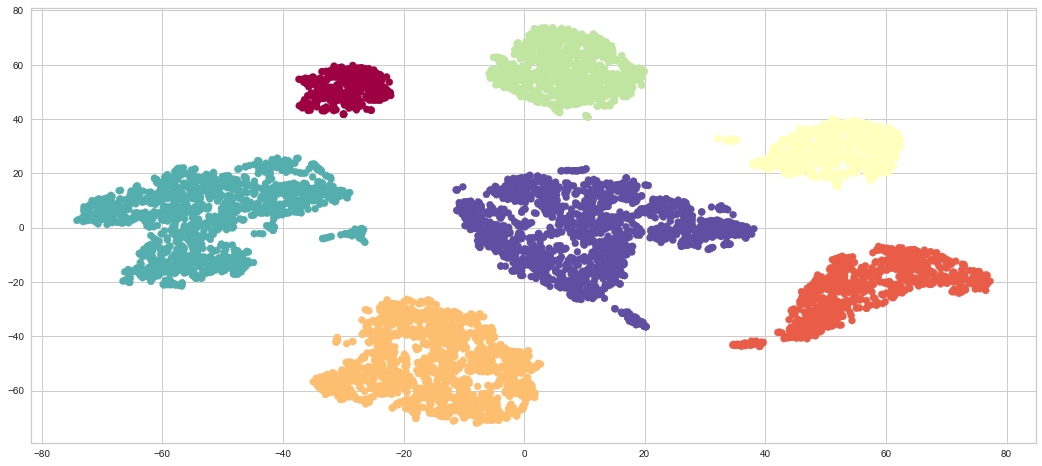

In [19]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_res["cluster"].values, cmap=plt.cm.Spectral)
plt.show()

<h3> Characterization of individual Clusters </h3>

In [55]:
scaler = StandardScaler()
data_copy = pd.DataFrame(scaler.fit_transform(data_log_trans), columns=data_log_trans.columns)
data_copy["cluster"] = data_res["cluster"].values

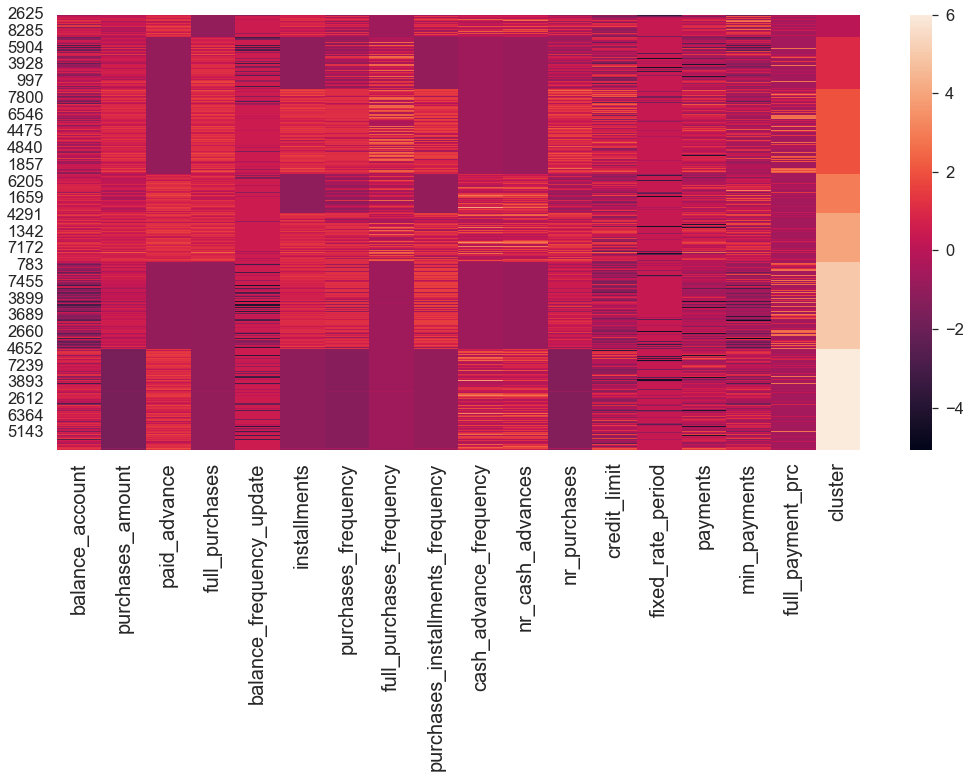

In [56]:
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.heatmap(data_copy.sort_values(by="cluster"))
ax.tick_params(axis='x', rotation=90 , labelsize=20)
plt.show()

In [21]:
#data_res.to_csv("card_transactions_7_clusters.csv")